<centre><h2>**GENDER-BASED VIOLENCE IN KENYA - ANALYSIS**</centre></h2>

This analysis seeks to answer the following questions:
<br>what was the most common reason given in the survey as to why women were beaten?</br>
<br>How do the two genders, male and female compare when it comes to supporting gender violence against women?</br>
<br>How age,residence and level of education relates to women's justification of gender violence?</br>

In [5]:
import pandas as pd
df=pd.read_csv('violence_data.csv') #load the dataset
df.head(5)


,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [6]:
#an overview of the dataset
df.info

<bound method DataFrame.info of        RecordID      Country Gender Demographics Question  \
0             1  Afghanistan      F        Marital status   
1             1  Afghanistan      F             Education   
2             1  Afghanistan      F             Education   
3             1  Afghanistan      F             Education   
4             1  Afghanistan      F        Marital status   
...         ...          ...    ...                   ...   
12595       210     Zimbabwe      M             Residence   
12596       280     Zimbabwe      M             Residence   
12597       280     Zimbabwe      M             Residence   
12598       350     Zimbabwe      M             Residence   
12599       350     Zimbabwe      M             Residence   

              Demographics Response                                 Question  \
0                     Never married                ... if she burns the food   
1                            Higher                ... if she burns the foo

In [7]:
df.describe(include ='all') #descriptive statistics

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
count,12600.000000,12600,12600,12600,12600,12600,12600,11187.000000
unique,NaN,70,2,5,15,6,18,NaN
top,NaN,Afghanistan,F,Education,Never married,... if she burns the food,01/01/2013,NaN
freq,NaN,180,6300,3360,840,2100,1980,NaN
mean,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,19.762537
std,121.248024,NaN,NaN,NaN,NaN,NaN,NaN,16.986437
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,105.750000,NaN,NaN,NaN,NaN,NaN,NaN,6.200000
50%,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.900000
75%,315.250000,NaN,NaN,NaN,NaN,NaN,NaN,29.200000


Exploring the interview questions asked

In [8]:
# unique demographic question categories 
df['Demographics Question'].unique()

array(['Marital status', 'Education', 'Employment', 'Age', 'Residence'],
      dtype=object)

In [9]:
df['Country'].unique() #countries featured

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [10]:
# Display the unique demographic questions asked during the interview
df['Question'].unique()

array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

In [11]:
kenya_df=df[df.Country=='Kenya'] # Filter the dataset to include only records from Kenya
kenya_df.head(5)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
6120,385,Kenya,F,Age,15-24,... for at least one specific reason,01/01/2014,42.0
6121,385,Kenya,F,Age,25-34,... for at least one specific reason,01/01/2014,39.8
6122,385,Kenya,F,Age,35-49,... for at least one specific reason,01/01/2014,44.0
6123,105,Kenya,F,Age,15-24,... if she argues with him,01/01/2014,20.9
6124,105,Kenya,F,Age,25-34,... if she argues with him,01/01/2014,20.1


In [12]:
#what was the most common reason given in the survey as to why women were beaten?
violence_reasons = kenya_df[kenya_df["Question"].str.contains("if she", case=False, na=False)].groupby("Question")["Value"].mean().sort_values(ascending=False)
violence_reasons

Question
... if she neglects the children           30.976667
... if she argues with him                 21.246667
... if she goes out without telling him    20.986667
... if she refuses to have sex with him    13.523333
... if she burns the food                   6.220000
Name: Value, dtype: float64

Most common reason for violence.....**if she neglects the children (30.98%)**

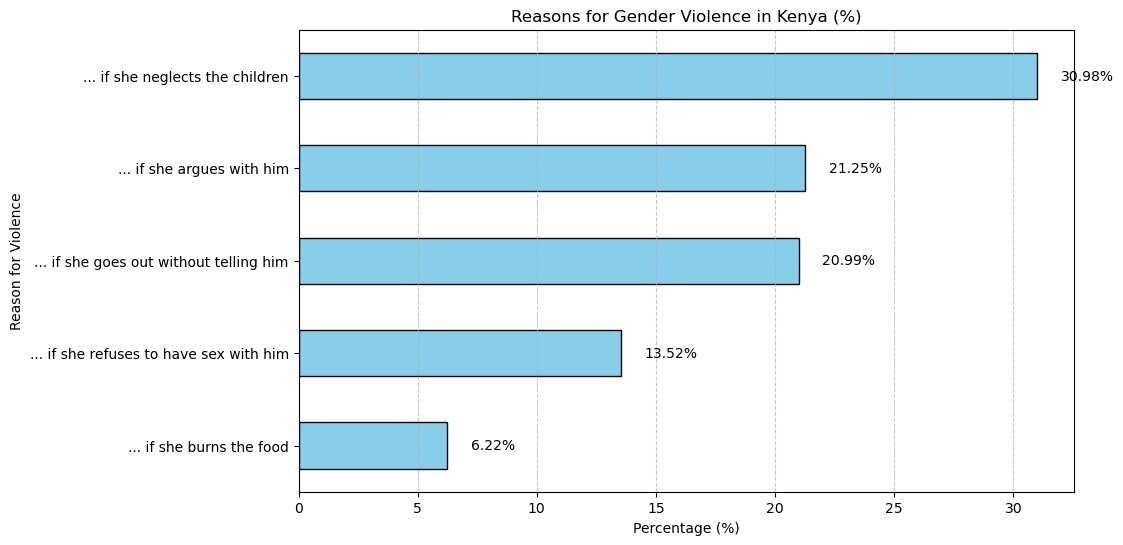

In [16]:
#Visualizing the responses in terms of %
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
violence_reasons.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Percentage (%)")
plt.ylabel("Reason for Violence")
plt.title("Reasons for Gender Violence in Kenya (%)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
for index, value in enumerate(violence_reasons.sort_values()):
    plt.text(value + 1, index, f"{value:.2f}%", va="center", fontsize=10)
plt.show()

In [ ]:
#How do the two genders, male and female compare when it comes to supporting gender violence against women?
gender_support = kenya_df[kenya_df["Question"].str.contains("if she", case=False, na=False)].groupby("Gender")["Value"].mean().sort_values(ascending=False)
print("\nSupport for gender violence:")
print(gender_support)

In [ ]:
#how age relates to women's justification of gender violence
df_filter=kenya_df[(kenya_df['Gender']=='F')& (kenya_df['Demographics Question']=='Age')]
age_justification = df_filter.groupby("Demographics Response")["Value"].mean().sort_index()

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(age_justification.index, age_justification.values, marker='o', linestyle='-', color='purple')
plt.xlabel("Age Group")
plt.ylabel("Average Justification for Violence (%)")
plt.title("Justification of Gender Violence by Age Group (Women in Kenya)")
plt.xticks(rotation=30)

# Adding data labels
for i, txt in enumerate(age_justification.values):
    plt.text(i, txt, f"{txt:.2f}%", ha='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display the results in dictionary format
age_justification.to_dict()

from the graph above,it is evident that older women (35-49) are more likely to justify gender violence compared to the younger women

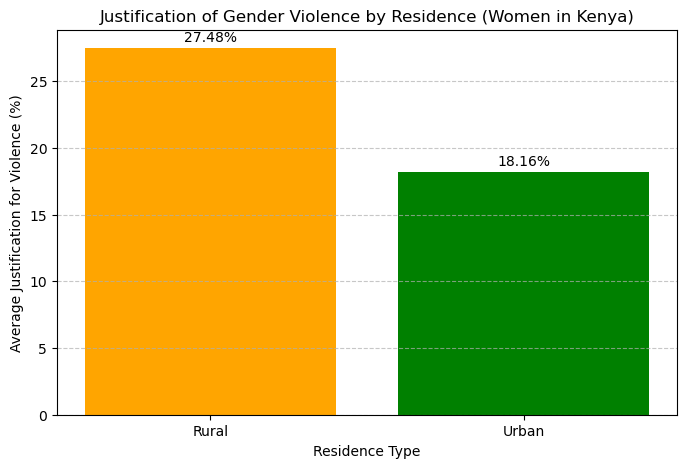

In [14]:
#comparing urban vs. rural differences
# Filter data for women and the question on residence
df_women = df[df["Gender"] == "F"]
df_women_residence = df_women[df_women["Demographics Question"] == "Residence"]

# Grouping by residence type and calculate the average 
residence_vs_justification = df_women_residence.groupby("Demographics Response")["Value"].mean()

# Plot the comparison
plt.figure(figsize=(8, 5))
plt.bar(residence_vs_justification.index, residence_vs_justification.values, color=['orange', 'green'])

# Add labels and title
plt.xlabel("Residence Type")
plt.ylabel("Average Justification for Violence (%)")
plt.title("Justification of Gender Violence by Residence (Women in Kenya)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotating the bars
for i, value in enumerate(residence_vs_justification.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha="center", fontsize=10)


plt.show()# Show the plot


The chart confirms that women in rural areas tend to support gender violenece compared to those living in urban areas./n These could be attaributed to cultural norms or lower exposure to gender equality campaigns

**T-test to compare how education level relate to the justification of gender violence.**

**H₀ (Null Hypothesis)**: There is no significant difference in the justification of gender violence between women with higher education and those with primary education.
<br>**H₁ (Alternative Hypothesis)**: There is a significant difference in the justification of gender violence between women with higher education and those with primary education.</br>

In [15]:

from scipy.stats import ttest_ind
df_women = df[df["Gender"] == "F"]
df_education = df_women[df_women["Demographics Question"] == "Education"]

# Group: Higher Education vs. Primary Education
higher_edu = df_education[df_education["Demographics Response"] == "Higher"]["Value"].dropna()
primary_edu = df_education[df_education["Demographics Response"] == "Primary"]["Value"].dropna()

if len(higher_edu) > 1 and len(primary_edu) > 1:
    t_stat_edu, p_value_edu = ttest_ind(higher_edu, primary_edu, equal_var=False)
    print("\nEducation Level Analysis:")
    print(f"T-Statistic: {t_stat_edu:.2f}, P-Value: {p_value_edu:.5f}")
    if p_value_edu < 0.05:
        print("Education level significantly impacts justification of gender violence.")
    else:
        print("No significant difference based on education level.")
else:
    print("\nEducation Level Analysis: Not enough data for t-test.")


Education Level Analysis:
T-Statistic: -15.33, P-Value: 0.00000
Education level significantly impacts justification of gender violence.
